#Trabalho Final

##Introdução


##Código

###Instalando das Bibliotecas


In [ ]:
!pip install pandas numpy matplotlib

###Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####Leitura dos dados

In [ ]:
df = pd.read_csv('MICRODADOS_ENEM_2023.csv', sep=';', encoding='latin1')

In [ ]:
colunas_renomeadas = {
    'NU_INSCRICAO': 'inscricao',
    'TP_SEXO': 'sexo',
    'TP_FAIXA_ETARIA': 'faixa_etaria',
    'TP_ESTADO_CIVIL': 'estado_civil',
    'TP_COR_RACA': 'cor_raca',
    'TP_NACIONALIDADE': 'nacionalidade',
    'TP_ST_CONCLUSAO': 'status_conclusao',
    'TP_ESCOLA': 'tipo_escola',
    'TP_ENSINO': 'modalidade_ensino',
    'TP_PRESENCA_CN': 'presenca_natureza',
    'TP_PRESENCA_CH': 'presenca_humanas',
    'TP_PRESENCA_LC': 'presenca_linguagens',
    'TP_PRESENCA_MT': 'presenca_matematica',
    'NU_NOTA_CN': 'nota_natureza',
    'NU_NOTA_CH': 'nota_humanas',
    'NU_NOTA_LC': 'nota_linguagens',
    'NU_NOTA_MT': 'nota_matematica',
    'NU_NOTA_REDACAO': 'nota_redacao',
    'TP_STATUS_REDACAO': 'status_redacao',
    'Q006': 'faixa_renda_familiar'}

df.rename(columns=colunas_renomeadas, inplace=True)


In [ ]:
df['sexo'] = df['sexo'].map({'M': 'Masculino', 'F': 'Feminino'})


In [ ]:
mapa_presenca = {0: 'Faltou', 1: 'Presente', 2: 'Eliminado'}
df['presenca_natureza'] = df['presenca_natureza'].map(mapa_presenca)
df['presenca_humanas'] = df['presenca_humanas'].map(mapa_presenca)
df['presenca_linguagens'] = df['presenca_linguagens'].map(mapa_presenca)
df['presenca_matematica'] = df['presenca_matematica'].map(mapa_presenca)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24260 entries, 0 to 24259
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inscricao               24260 non-null  int64  
 1   NU_ANO                  24260 non-null  int64  
 2   faixa_etaria            24260 non-null  int64  
 3   sexo                    24260 non-null  object 
 4   estado_civil            24260 non-null  int64  
 5   cor_raca                24260 non-null  int64  
 6   nacionalidade           24260 non-null  int64  
 7   status_conclusao        24260 non-null  int64  
 8   TP_ANO_CONCLUIU         24260 non-null  int64  
 9   tipo_escola             24260 non-null  int64  
 10  modalidade_ensino       7893 non-null   float64
 11  IN_TREINEIRO            24260 non-null  int64  
 12  CO_MUNICIPIO_ESC        4546 non-null   float64
 13  NO_MUNICIPIO_ESC        4546 non-null   object 
 14  CO_UF_ESC               4546 non-null 

####Abrindo os datasets inicialmente

In [ ]:
df.shape

(529073, 76)

In [ ]:
df.columns.tolist()

['inscricao',
 'NU_ANO',
 'faixa_etaria',
 'sexo',
 'estado_civil',
 'cor_raca',
 'nacionalidade',
 'status_conclusao',
 'TP_ANO_CONCLUIU',
 'tipo_escola',
 'modalidade_ensino',
 'IN_TREINEIRO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'SG_UF_PROVA',
 'presenca_natureza',
 'presenca_humanas',
 'presenca_linguagens',
 'presenca_matematica',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'nota_natureza',
 'nota_humanas',
 'nota_linguagens',
 'nota_matematica',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TP_LINGUA',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'status_redacao',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'nota_redacao',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'faixa_renda_fa

In [ ]:
#Participantes presentes
# Filtra apenas os participantes que estiveram presentes em todas as provas
presentes = df[
    (df['presenca_natureza'] == 'Presente') &
    (df['presenca_humanas'] == 'Presente') &
    (df['presenca_matematica'] == 'Presente') &
    (df['presenca_linguagens'] == 'Presente')
]

df['presenca_matematica'].value_counts()

,count
presenca_matematica,


In [ ]:
#Média, mediana, desvio padrão das notas
presentes[['nota_natureza', 'nota_humanas', 'nota_lingugens', 'nota_matematica', 'nota_redacao']].describe()

KeyError: "['nota_lingugens'] not in index"

In [ ]:
#Média por sexo
medias_por_sexo = presentes.groupby('sexo')[
    ['nota_natureza', 'nota_humanas', 'nota_linguagens', 'nota_matematica', 'nota_redacao']
].mean()

In [ ]:
#Média, mediana, desvio padrão etc.
presentes[['nota_natureza', 'nota_humanas', 'nota_linguagens', 'nota_matematica', 'nota_redacao']].describe()

,nota_natureza,nota_humanas,nota_linguagens,nota_matematica,nota_redacao
count,814260.000000,814260.000000,814260.000000,814260.000000,814260.000000
mean,491.764772,524.970297,518.819821,526.204705,640.903422
std,85.704484,85.198132,73.133931,128.556116,207.644432
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,437.100000,470.700000,472.600000,426.300000,520.000000
50%,487.700000,530.400000,522.500000,512.400000,640.000000
75%,544.900000,583.900000,569.300000,617.500000,800.000000
max,868.400000,823.000000,801.100000,958.600000,1000.000000


In [ ]:
#Média geral das notas
notas_mt = presentes['nota_matematica'].to_numpy()
notas_ch = presentes['nota_humanas'].to_numpy()
notas_lc = presentes['nota_linguagens'].to_numpy()
notas_cn = presentes['nota_natureza'].to_numpy()


notas_geral = notas_mt + notas_ch + notas_lc + notas_cn
notas_geral = notas_geral / 4
notas_geral.mean()


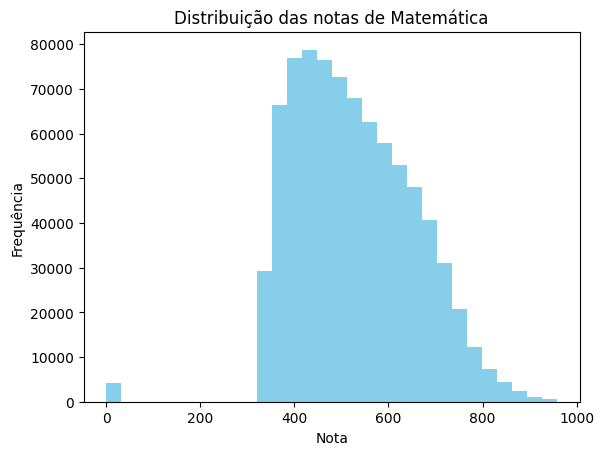

In [ ]:
#Histogramas das notas
plt.hist(presentes['nota_matematica'], bins=30, color='skyblue')
plt.title('Distribuição das notas de Matemática')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

<Axes: title={'center': 'nota_redacao'}, xlabel='sexo'>

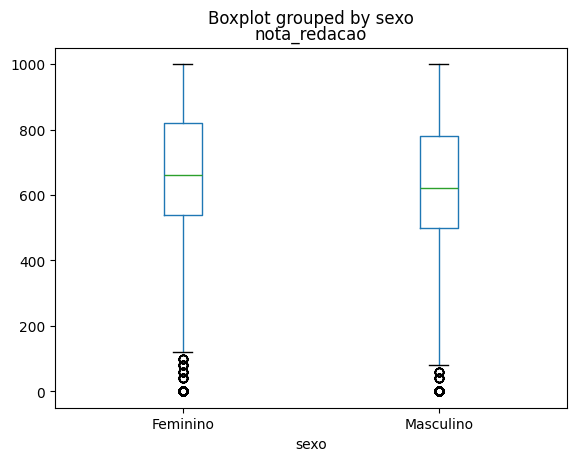

In [ ]:
#Boxplot da Redação por sexo
presentes.boxplot(column='nota_redacao', by='sexo', grid=False)

Text(0, 0.5, 'Total de Participantes')

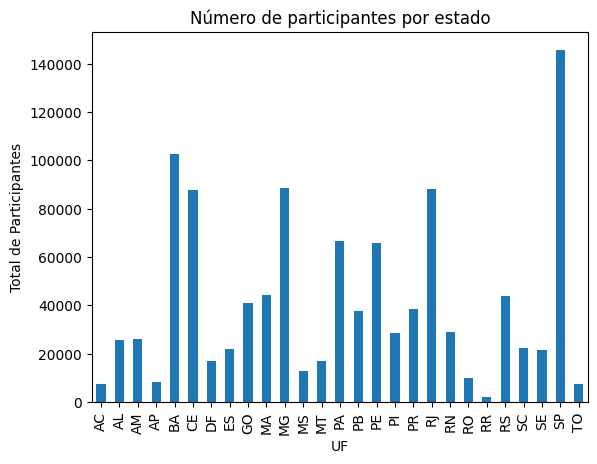

In [ ]:
#Gráfico de barras dos participantes por estado
df['SG_UF_PROVA'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de participantes por estado')
plt.xlabel('UF')
plt.ylabel('Total de Participantes')

In [ ]:
#Média da nota de Matemática por estado
presentes.groupby('SG_UF_PROVA')['nota_matematica'].mean().sort_values(ascending=False)

In [ ]:
#Média da nota de Humanas por tipo de escola
presentes.groupby('TP_ESCOLA')['nota_humanas'].mean()

In [ ]:
#Nota média por faixa de renda
presentes.groupby('faixa_renda_familiar')[['nota_matematica', 'nota_humanas', 'nota_linguagens', 'nota_natureza']].mean()

,nota_matematica,nota_humanas,nota_linguagens,nota_natureza
faixa_renda_familiar,,,,
A,453.855141,479.823890,476.798422,452.062829
B,478.783335,497.358782,494.700455,465.133545
C,513.243837,520.195981,515.588813,484.191932
D,533.520803,532.345298,526.310979,495.603216
E,553.347351,542.895578,535.836582,506.443119
F,574.097899,553.357877,543.950264,516.811452
G,591.391117,563.120980,551.903824,527.540172
H,611.163029,572.285445,559.635962,539.586811
I,624.304481,579.563027,565.430790,547.019873


In [1]:
#Gráfico média por sexo
ax = medias_por_sexo_renomeado.T.plot(
    kind='bar',
    figsize=(10, 6),
    color=['blue', 'deeppink']
)
plt.title('Média das Notas por Área e Sexo')
plt.xlabel('Área do Conhecimento')
plt.ylabel('Nota Média')
plt.xticks(rotation=0)
plt.legend(['Masculino', 'Feminino'], title='Sexo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'medias_por_sexo_renomeado' is not defined

###Funções Auxiliares